# Project description
Real or Not? NLP with Disaster Tweets: In this project you are challenged to build a Machine
Learning model that can predict which tweets are about a real disaster and which are not. The
project topic is based around a Kaggle competition. You can find the link to the competition here.
You will find more information about the project and the dataset in the competition page.

In this project, you will have the chance to compare your prediction results with your fellows (and
also other Kaggle users). Make an account in Kaggle (if you don’t have already) and join the
competition. As soon as you make a submission you can see the prediction accuracy and your
ranking in the leaderboard. Note that you can only make 5 submissions per day. To know more
about the competition rules, check the competition page in Kaggle.

**Table of contents**
1. Packages and libraries installation
2. Database

  2.1 Data Exploration

3. Exploratory data analysis
  
  3.1 Distribution real and non-real tweets

  3.2 Distribution tweet length

  3.3 Understanding location

  3.3.2 Distribution location 

  3.3.3 Distribution location for not real disaster

  3.3.4 Distribution location for real disaster

  3.4 Possible patterns between Real and Not Real tweets

  3.4.1 Understanding tweet's patterns by location
  
  3.4.2 Understanding URL's patterns for not real disater tweets

  3.4 Distribution keyword (real disaster and not)

  **3.5 Word Frequency -> TO DO**

  **3.5.1 Ngrams = 1 -> TO DO**

  **3.5.2 Ngrams = 2 -> TO DO**

  3.7 Keywords distribution graph

4. Data cleaning (remove ponctuation (Florian),remove stopwords, lemmatization, one-hot-encoding, stemming (Florian), special signs, etc.)

5. Machine Learning

  5.1 Logistic Regression Classifier

  5.2 K Neighbors Classifier

  5.3 Decision Tree Classifier

  5.4 Random Forest Classifier


## 1. Packages and libraries installation

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
import io
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer

## 2. Database

In [0]:
# The dataset 
train = pd.read_csv("https://raw.githubusercontent.com/SarahBuechner/BigScale_Disaster_true_or_not/master/data/train.csv", encoding="utf-8")
test = pd.read_csv("https://raw.githubusercontent.com/SarahBuechner/BigScale_Disaster_true_or_not/master/data/test.csv", encoding="utf-8")

### 2.1 Data Exploration

Before start, let's analyze the different types of data contained in our `train` dataset (notice that you find the same in the `test` dataset) 

**Findings**: We can see that the set of the elements are objects apart from the identifiers which are of the integer type.

In [54]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

**Different possible location**

In [55]:
n = 20 # Select total number of unique locations you want to display
locations = train["location"].unique()
for location in locations[0:n]:
  print(location)

nan
Birmingham
Est. September 2012 - Bristol
AFRICA
Philadelphia, PA
London, UK
Pretoria
World Wide!!
Paranaque City
Live On Webcam
milky way
GREENSBORO,NORTH CAROLINA
England.
Sheffield Township, Ohio
India
Barbados
Anaheim
Abuja
USA
South Africa


**Display of the elements that do not constitute a real disaster (target = 0).**

In [56]:
target_0 = train[(train['target'] == 0)]  
print(target_0.head(10))

    id keyword location                          text  target
15  23     NaN      NaN                What's up man?       0
16  24     NaN      NaN                 I love fruits       0
17  25     NaN      NaN              Summer is lovely       0
18  26     NaN      NaN             My car is so fast       0
19  28     NaN      NaN  What a goooooooaaaaaal!!!!!!       0
20  31     NaN      NaN        this is ridiculous....       0
21  32     NaN      NaN             London is cool ;)       0
22  33     NaN      NaN                   Love skiing       0
23  34     NaN      NaN         What a wonderful day!       0
24  36     NaN      NaN                      LOOOOOOL       0


**Display of the elements that are real and therefore the target at 1**

In [57]:
target_1 = train[(train['target'] == 1)]
print(target_1.head(10))

   id keyword  ...                                               text target
0   1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1   4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2   5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3   6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4   7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1
5   8     NaN  ...  #RockyFire Update => California Hwy. 20 closed...      1
6  10     NaN  ...  #flood #disaster Heavy rain causes flash flood...      1
7  13     NaN  ...  I'm on top of the hill and I can see a fire in...      1
8  14     NaN  ...  There's an emergency evacuation happening now ...      1
9  15     NaN  ...  I'm afraid that the tornado is coming to our a...      1

[10 rows x 5 columns]


### 3.1 Distribution real and non-real tweets

Display of the distribution between the real and non-real tweets. 

**Findings:** We can see that there are a bit more non-real cases but the sample is quite balanced, so there is no need to up-sampled the minority class.

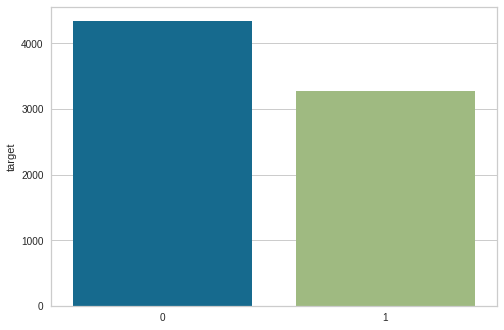

In [58]:
a = train.target.value_counts()
sns.barplot(a.index,a)

### 3.2 Distribution tweet length
In order to get a better idea of the elements that differentiate the tweets from a disaster and those that are not, we will analyze the structure of each tweet. For example, here we can see the distribution of the number of words in each case. There is no significant difference between the two cases.

**Findings:** There is no difference based on the total number of words contained in a tweet from real and not real disaster. 

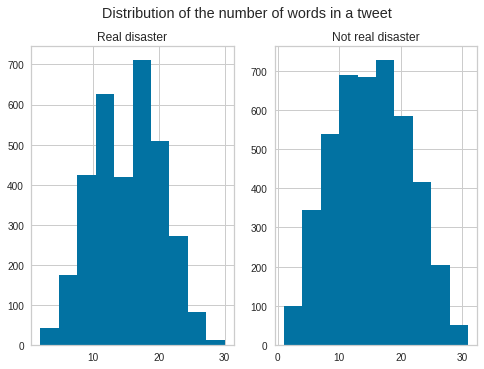

In [59]:
fig,(axR,axN)=plt.subplots(1,2)
train_len=train[train['target']==1]['text'].str.split().map(lambda x: len(x))
axR.hist(train_len)
axR.set_title('Real disaster')

train_len=train[train['target']==0]['text'].str.split().map(lambda x: len(x))
axN.hist(train_len)
axN.set_title('Not real disaster')

fig.suptitle('Distribution of the number of words in a tweet')
plt.show()

### 3.3.1 Distribution location (not real disaster)

**Display** of the different locations with the corresponding number of tweets for **No real disaster**

In [60]:
target_0['location'].value_counts().head(n=20)

New York           55
USA                37
London             29
United States      23
Los Angeles, CA    18
Canada             16
Kenya              15
Everywhere         12
UK                 11
Florida            11
NYC                10
California         10
United Kingdom     10
ss                  9
Australia           9
304                 9
London, England     9
Chicago, IL         9
New York, NY        8
San Francisco       8
Name: location, dtype: int64

### 3.3.2 Distribution location

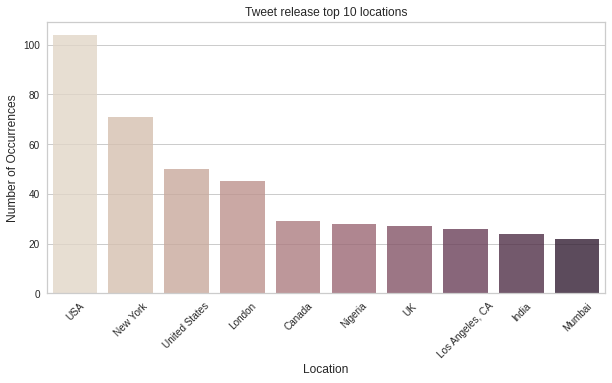

In [61]:
# Tweet location for real and not real disasters
n = 10 # select total number of locations you want to display
location_count  = train['location'].value_counts()[:n,]
plt.figure(figsize=(10,5))

sns.barplot(location_count.index, location_count.values,palette="ch:.25", alpha=0.8)
plt.title('Tweet release top ' + str(n) + ' locations')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 3.3.3 Distribution location for not real disasters

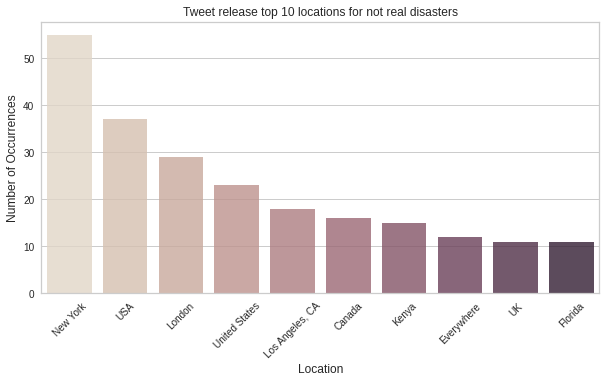

In [62]:
# Tweet location for not real disasters
n = 10 # select total number of locations you want to display
location_count  = target_0['location'].value_counts()[:n,]
plt.figure(figsize=(10,5))

sns.barplot(location_count.index, location_count.values,palette="ch:.25", alpha=0.8)
plt.title('Tweet release top ' + str(n) + ' locations for not real disasters')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 3.3.4 Distribution location for real disasters

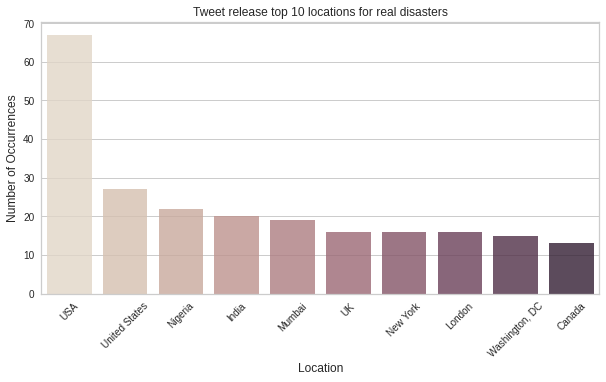

In [63]:
# Tweet location for real disasters
n = 10 # select total number of locations you want to display
location_count  = target_1['location'].value_counts()[:n,]
plt.figure(figsize=(10,5))

sns.barplot(location_count.index, location_count.values,palette="ch:.25", alpha=0.8)
plt.title('Tweet release top ' + str(n) + ' locations for real disasters')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [0]:
# TO DO STAKED Barplot

**Findings**: It seems that location does not affect whether the tweet was about a real disaster or not

## 3.4 Possible patterns between Real and Not Real tweets
### 3.4.1 Understanding tweet's patterns by location
Once we saw that location seems not to be relevant to classify the tweet what we are now wondering if tweets 
from a given location follow any write common patern

**Findings**:
- If the tweet is repeated more than once it's more probably to be a tweet for a not real disaster ?
- In general, tweets of not real disasters tends have more grammar errors as well as invented words rather than those about real disasters.

In [65]:
# Tweets of not real disasters in USA
n = 10 # specify here how many tweets you want to display
location = "USA" # specify here how many tweets you want to display

train_0_USA = train[(train['location'] == location) & (train['target'] == 0)]
for tweet in train_0_USA["text"][0:n]:
  print(tweet)

One thing for sure-God has promised Israel will not be annihilated. But...the horror of Iran w/nukes. https://t.co/xn09Mx6sxy
YOUR PHONE IS SPYING ON YOU! Hidden Back Door NSA Data Mining Software | THE FINANCIAL ARMAGEDDON BLOG http://t.co/qyCw5JJaj1
Black Eye 9: A space battle occurred at Star O784 involving 2 fleets totaling 4103 ships with 50 destroyed
City program to help turn blight into greenspace: The Tennessee Housing DevelopmentÛ_ http://t.co/ZZcbBQyJ1q  #news http://t.co/KKSgHsblFH
@troylercraft YEAH ITS NOT WORTH IT BC HE ALREADY HAS SO MANY SPAMMERS &amp; HIS TWITTER IS PROBABLY BLOWN UP EVERY SECOND
@sholt87 @MtGrotto @Eco11C @carlsbadbugkil1 Saved us?Bush lowered tax rate for wealthy n economy collapsed w/Middle Class 401ks destroyed.
Petition | Heartless owner that whipped horse until it collapsed is told he can KEEP his animal! Act Now! http://t.co/nJRjxqBjr4
When high fashion and food collide: Gucci has chosen one of ShanghaiÛªs most popular commercial avenue... htt

In [66]:
# Tweets of real disasters in USA
train_1_USA = train[(train['location'] == location) & (train['target'] == 1)]
for tweet in train_1_USA["text"][0:n]:
  print(tweet)

#Kurds trampling on Turkmen flag later set it ablaze while others vandalized offices of Turkmen Front in #Diyala http://t.co/4IzFdYC3cg
Twelve feared killed in Pakistani air ambulance helicopter crash http://t.co/TH9YwBbeet #worldNews
Thousands attend a rally organized by Peace Now protesting the arson attack that took the life of an http://t.co/bvCKd9pdTi
Palestinian Teen Killed Amid Protests Against Arson Attack http://t.co/okVsImoGic
Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ... http://t.co/a6wmbnR51S
Black Eye 9: A space battle occurred at Star M27329 involving 1 fleets totaling 1236 ships with 7 destroyed
#News FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps (say what?): åÊFedEx no... http://t.co/K0Y7xFxmXA #TCOT
'American Weapons and Support Are Fueling a Bloody Air War in Yemen' http://t.co/7aGeAkVn2x
Another day has passed and THANKFULLY Central Command has CONFIRMED NO new casualties. Please pray

### 3.4.2 Understanding URL's patterns for not real disater tweets
What one may think is when tweets are about not real disasters the URL may be invented, let's study if there is any pattern among them.

**Findings**: Using "eye analysis" one can not asserve whether there is evidence that unreal URL are different from the real ones.

In [67]:
# Real vs not real URLs
list_URL_real = ['httptcoth9ywbbeet','httptco4izfdyc3cg','httptcobvckd9pdti','httptcookvsimog','httptcoa6wmbnr51']
list_URL_unreal = ['httpstcoxn09mx6sxi','httptcoqycw5jjaj1', 'httptcozzcbbqyj1q', 'httptcokksghsblfh', 'httptconjrjxqbjr4']

for url in list_URL_real:
  print(len(url))

print('')
for url in list_URL_unreal:
  print(len(url))

17
17
17
15
16

18
17
17
17
17


**Display of the keywords for Real disaster**

In [68]:
target_1['keyword'].value_counts().head(n=20)

outbreak               39
wreckage               39
derailment             39
typhoon                37
debris                 37
oil%20spill            37
rescuers               32
suicide%20bomb         32
evacuated              32
suicide%20bombing      32
razed                  31
nuclear%20disaster     31
earthquake             30
airplane%20accident    30
suicide%20bomber       30
collision              29
bridge%20collapse      29
wildfire               29
mass%20murder          28
drought                28
Name: keyword, dtype: int64

**Display the keywords for No Real disaster**

In [69]:
target_0['keyword'].value_counts().head(n=20)

body%20bags    40
harm           37
armageddon     37
wrecked        36
ruin           36
deluge         36
fear           35
siren          35
twister        35
explode        35
aftershock     34
panic          34
screaming      34
sinking        33
traumatised    33
blazing        33
blizzard       33
crush          33
blaze          33
hellfire       32
Name: keyword, dtype: int64

**WordCloud**

### Worldcloud of disaster & no-disaster tweets

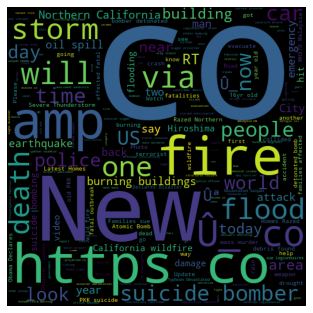

In [70]:
dis_words = ' '.join(list(train[train['target'] == 1]['text']))
dis_wc = WordCloud(width = 512,height = 512).generate(dis_words)
plt.imshow(dis_wc)
plt.axis('off')
plt.show()

### Worldcloud of disaster tweets

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


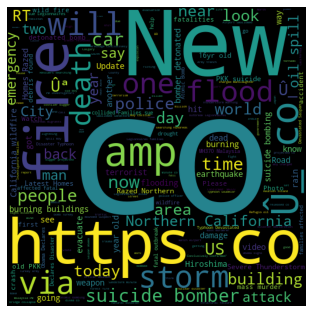

In [71]:
dis_words = ' '.join(list(target_1[train['target'] == 1]['text']))
dis_wc = WordCloud(width = 512,height = 512).generate(dis_words)
plt.imshow(dis_wc)
plt.axis('off')
plt.show()

# Data Cleaning

In [0]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [0]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

In [0]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
from nltk.tokenize import word_tokenize
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text

In [75]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
import nltk
nltk.download('punkt')
train["text"] = train["text"].apply(lambda x: convert_abbrev_in_text(x))
test["text"] = test["text"].apply(lambda x: convert_abbrev_in_text(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Before computing the models we need to implement the function `master_data_preprocessin` which allows the user to tokenize the tweet removing the noise:

**Tokens removed:**
- Stop words
- Punctuation

**Tokens modification:**
- Stemming
- Lemmatizing

**Arguments:**
- text: array containing the tweets.

In [195]:
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer

def stopwords2(text):
      # Remove url
    # Remove stopwords
    customStopWords = set(stopwords.words('english')+["i'm","he's", "i've", "i'd", "can't", "they'll","i'll", "we'll", "it'll", "you'll", ])

    text = text.apply(lambda x: " ".join([word for word in x.lower().split() if word not in customStopWords]))
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [188]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [196]:

x = stopwords2(train["text"])
for i in x:
  print(i)



Streaming output truncated to the last 5000 lines.
crackdown 3 destruction restricted multiplayer: crackdown 3 impressed earlier week demonstratio... http://t.co/lmwkjsycgj
@danhrothschild greed fuel self-destruction. #takecare
@cinla1964 @windowgatribble contrasts foreboding destruction enhanced expansive divisions color saturation contrast hue!
russian authorities take account petition destruction sanctioned food: vladimir putin's press... http://t.co/qbmcsjavt0
fall back first break homebuyer miscalculation could destruction thousands: mwjcdk
there's #fly loose workspace two #bored #cats. forsee terrible things. #destruction #badkitty #thisiswhywecanthavenicethings
@lt3dave many specs much fan service much lore destruction
truck driver salvages banned tomatoes destruction #russian border http://t.co/7b2wf6ovfk #news
republican styled economic destruction | undergroundbestsellers http://t.co/dili5jhmur
cause self destruction
#putin decree results destruction 10 tons imported cheese n

In [0]:
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer


def master_data_preprocessing(text):

    # Remove url
    text = text.apply(lambda x : re.sub(r"http\S{0,}", " ", x))

    # Remove the hastag "#" and keep the word
    text = text.apply(lambda x: " ".join(word.replace("#", " ") for word in x.split()))

    '''# Remove HTML tags
    text = text.apply(lambda x :re.compile(r'<.*?>').sub(r'',x))'''
    
    '''# Remove other characters
    text = text.apply(lambda x : re.sub("[^a-zA-Z]", " ",x))'''

    #Remove emojis
    '''text = text.apply(lambda x :re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE).sub(r'', x))'''

    # Remove tokens with less than 2 charcters
    text = text.apply(lambda x : re.sub(r'\b\w{0,2}\b', '', x))

    # Remove stopwords
    #customStopWords = set(stopwords.words('english')+["i'm","he's", "i've", "i'd", "can't", "they'll","i'll", "we'll", "it'll", "you'll", ])
    text = text.apply(lambda x: " ".join([word for word in x.lower().split() if word not in stopwords.words('english')]))

    # Remove punctuation method: (here we delete also "#")
    text = text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

    '''   pattern = r"[{}]".format(string.punctuation.replace(":", "")) # don't remove ":"
    text = text.apply(lambda x : re.sub(pattern, "", x))'''

    # Stemming method
    text = text.apply(lambda x: " ".join([SnowballStemmer("english").stem(word) for word in x.split()]))

    # Lemmatizing method
    space_tokenizer = WhitespaceTokenizer()
    lemmatizer = WordNetLemmatizer()
    text = text.apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in space_tokenizer.tokenize(x)]))
    
    return text



## Studying "doublons" -> 305 records (4%)



In [77]:
# the code in the cell is taken from 
# https://www.kaggle.com/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert
df_mislabeled = train.groupby(['text']).nunique().sort_values(by='target', ascending=False)
df_mislabeled = df_mislabeled[df_mislabeled['target'] > 1]['target']
index_misl = df_mislabeled.index.tolist()

lenght = len(index_misl)

print(f"There are {lenght} equivalence classes with mislabelling")

There are 18 equivalence classes with mislabelling


In [0]:
train_nu_target = train[train['text'].isin(index_misl)].sort_values(by = 'text')

In [79]:
copy = train_nu_target.copy()
classes = copy.groupby('text').agg({'keyword':np.size, 'target':np.mean}).rename(columns={'keyword':'Number of records in train set', 'target':'Target mean'})

classes.sort_values('Number of records in train set', ascending=False).head(20)

,Number of records in train set,Target mean
text,,
He came to a land which was engulfed in tribal war and turned it into a land of peace that is . Madinah . # ProphetMuhammad # islam,6,0.333333
The Prophet ( peace be upon him ) said 'Save yourself from Hellfire even if it is by giving half a date in charity . ',6,0.333333
To fight bioterrorism sir .,4,0.500000
.POTUS # StrategicPatience is a strategy for # Genocide ; refugees ; IDP Internally displaced people ; horror ; and so on . https : //t.co/rqWuoy1fm4,4,0.750000
that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time,4,0.500000
# Allah describes piling up # wealth thinking it would last # forever as the description of the people of # Hellfire in Surah Humaza . # Reflect,3,0.333333
CLEARED : incident with injury : I-495 inner loop Exit 31 - MD 97/Georgia Ave Silver Spring,3,0.666667
Hellfire is surrounded by desires so be careful and donÛªt let your desires control you ! # Afterlife,3,0.333333
# foodscare # offers2go # NestleIndia slips into loss after # Magginoodle # ban unsafe and hazardous for # humanconsumption,3,0.666667


In [0]:
majority_df = train_nu_target.groupby(['text'])['target'].mean()
#majority_df.index
def relabel(r, majority_index):
    ind = ''
    if r['text'] in majority_index:
        ind = r['text']
#        print(ind)
        if majority_df[ind] <= 0.5:
            return 0
        else:
            return 1
    else: 
        return r['target'] 

In [0]:
train['target'] = train.apply(lambda row: relabel(row, majority_df.index), axis = 1)

In [0]:
train["text_processed"] = master_data_preprocessing(train['text'])
test["text_processed"] = master_data_preprocessing(test['text'])

In [0]:
for i in train.loc[train['target'] == 0, 'text'][20:50]:
  print(i)

In [218]:
for i in train.loc[train['target'] == 0, 'text_processed'][20:1000]:
  print(i)

ablaz lord :
check out: nsfw
outsid you ablaz aliv you dead insid
awesom time visit cfc head offic ancop site ablaz thank tita vida take care
soooo pump ablaz southridgelif
want set chicago ablaz preach hotel
gain follow last week you know stat grow
build perfect tracklist life leav street ablaz
check out: nsfw
first night retain quit weird better get use wear everi singl night next year least
santa cruz  head elizabeth polic superintend lanford salmon
noch bestia alexissanchez: happi see teammat train hard goodnight gunner
set heart ablaz everi citi gift everi skylin like kiss upon lip 
sky ablaz tonight los angel expect fill sunset shot know peep
revel wmv video mean mac farewel ablaz wmv rout dvd: gtxrwm
progress greet month student would set pen ablaz torch public
rene ablaz amp jacinta secret 2k13 fallen sky edit mar 2013
nowplaying: rene ablaz amp ian buff magnitud edm
ablaz time talk until don know make due work
can kid cuz got bicycl accid amp split testicl imposs kid michael

**Tweet comparison with disaster dataset**
In order to improve the prediction of our tweet we have chosen to compare tweet to a word dataset about disasters. For this a match column has been added and if the tweet contains a word from the "word disaster" list it will take the value `true` otherwise `false`.

Import the dataset of words and process the same data 
cleaning than tweets

In [0]:
disaster_words = pd.read_csv("https://raw.githubusercontent.com/SarahBuechner/BigScale_Disaster_true_or_not/master/data/disaster_words.csv")
disaster_words = disaster_words["disaster word"].tolist()
keywords = train["keyword"].tolist()
dis_matches = []
key_matches = []

for tweet in train['text']:
  i = 0
  j = 0
  words = tweet.lower().split()
  for word in words:
    if word in keywords:
      i += 1
    if word in disaster_words:
      j += 1
  key_matches.append(i)
  dis_matches.append(j)
train["keyword_matches"] = key_matches
train["dis_matches"] = dis_matches


## Machine Learning

In [0]:
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [0]:
train['keyword'] = train['keyword'].fillna('None')
le = LabelEncoder()
encoded_keyword = pd.DataFrame(le.fit_transform(train["keyword"]), columns=["encoded_keyword"])
train = pd.concat((train, encoded_keyword), axis=1)

In [0]:
X = train['text_processed'] # the features we want to analyze
y = train['target'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

> **Count Vectorizer:** The most straightforward one, it counts the number of times a token shows up in the document and uses this value as its weight.


In [0]:
# Converting the tokens using CountVectorizer
cv = CountVectorizer(analyzer = "word")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [0]:
# Using the tfdfvectorizer
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [0]:
# Creating the classifiers
classifiers = [
    LogisticRegression(C = 0.0001, solver = 'lbfgs', max_iter = 200, class_weight = 'balanced'),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(max_depth=100, class_weight = 'balanced'),
    RandomForestClassifier(n_estimators = 200, class_weight = 'balanced' ),
    svm.SVC(kernel='rbf', C = 10.0, gamma=0.1)]

In [247]:
# CV: Computing the accuracy for each classifier
accuracies=[]
models=[]

for classifier in classifiers:
  fit = classifier.fit(X_train_cv, y_train)
  pred = fit.predict(X_test_cv)
  accuracy = accuracy_score(pred, y_test)
  print('Accuracy of '+ classifier.__class__.__name__ + ' is ' + str(accuracy))

Accuracy of LogisticRegression is 0.7971109652002626
Accuracy of KNeighborsClassifier is 0.6946815495732108
Accuracy of DecisionTreeClassifier is 0.7774130006565988
Accuracy of RandomForestClassifier is 0.7957977675640184
Accuracy of SVC is 0.799080761654629


In [241]:
# IDFTDF: Computing the accuracy for each classifier
accuracies=[]
models=[]

for classifier in classifiers:
  fit = classifier.fit(X_train_tfidf, y_train)
  pred = fit.predict(X_test_tfidf)
  accuracy = accuracy_score(pred, y_test)
  print('Accuracy of '+ classifier.__class__.__name__ + ' is ' + str(accuracy))

Accuracy of RandomForestClassifier is 0.7951411687458962


KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib/pytho

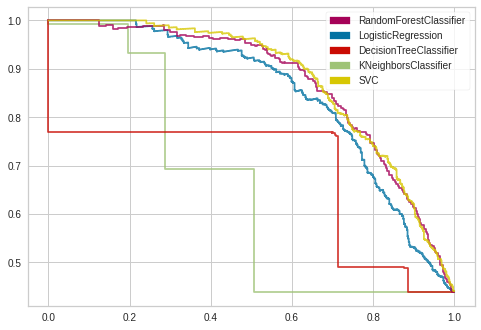

In [93]:
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.draw import manual_legend
for classifier in classifiers:  
  viz = PrecisionRecallCurve(classifier, fill_area=False, ap_score=False)
  viz.fit(X_train_cv, y_train)
  viz.score(X_test_cv, y_test)
  manual_legend(viz, ('RandomForestClassifier', 'LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC'), ('m', 'b', 'r', 'g','y'), frameon=True, loc='upper right')

##Ensemble methods
Ensemble methods are techniques that combine predictions from different machine learning algorithms. The idea is to increase the accuracy of predictions compared to predictions using individual models.  

In [0]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import svm

#Base_estimators
classifiers2 = [
                BaggingClassifier(LogisticRegression(C = 0.0001, solver = 'lbfgs', max_iter = 200, class_weight = 'balanced'), n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0),
                BaggingClassifier(KNeighborsClassifier(n_neighbors=3), n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0),
                BaggingClassifier(DecisionTreeClassifier(max_depth=100, class_weight = 'balanced'), n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0),
                BaggingClassifier(RandomForestClassifier(n_estimators = 200, class_weight = 'balanced' ), n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0),
                BaggingClassifier(svm.SVC(kernel='rbf', C = 10.0, gamma=0.1), n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
                ]

In [249]:
accuracies2=[]
models2=[]

for classifier in classifiers2:
  fit = classifier.fit(X_train_cv, y_train)
  pred = fit.predict(X_test_cv)
  accuracy = accuracy_score(pred, y_test)
  print('Accuracy of '+ classifier.__class__.__name__ + ' is ' + str(accuracy))

Accuracy of BaggingClassifier is 0.7662508207485227
Accuracy of BaggingClassifier is 0.6920551543007223
Accuracy of BaggingClassifier is 0.7839789888378201


KeyboardInterrupt: ignored

## **Neural network**

In [96]:
'''# KERAS PAU:
from keras.models import Sequential
from keras import layers

input_dim = X_train_cv.shape[1]  # Number of features

model = Sequential()

model.add(layers.Dense(600, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(200))
model.add(layers.Dense(150))
model.add(layers.Dense(10))
model.add(layers.Dense(1, activation='sigmoid'))'''

"# KERAS PAU:\nfrom keras.models import Sequential\nfrom keras import layers\n\ninput_dim = X_train_cv.shape[1]  # Number of features\n\nmodel = Sequential()\n\nmodel.add(layers.Dense(600, input_dim=input_dim, activation='relu'))\nmodel.add(layers.Dense(200))\nmodel.add(layers.Dense(150))\nmodel.add(layers.Dense(10))\nmodel.add(layers.Dense(1, activation='sigmoid'))"

In [97]:
'''# KERAS PAU:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()'''

"# KERAS PAU:\nmodel.compile(loss='binary_crossentropy', \n              optimizer='adam', \n              metrics=['accuracy'])\nmodel.summary()"

In [98]:
'''# KERAS PAU:
history = model.fit(X_train_cv, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test_cv, y_test),
                    batch_size=10)'''

'# KERAS PAU:\nhistory = model.fit(X_train_cv, y_train,\n                    epochs=100,\n                    verbose=False,\n                    validation_data=(X_test_cv, y_test),\n                    batch_size=10)'

In [99]:
'''# KERAS PAU:
loss, accuracy = model.evaluate(X_train_cv, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_cv, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))'''

'# KERAS PAU:\nloss, accuracy = model.evaluate(X_train_cv, y_train, verbose=False)\nprint("Training Accuracy: {:.4f}".format(accuracy))\nloss, accuracy = model.evaluate(X_test_cv, y_test, verbose=False)\nprint("Testing Accuracy:  {:.4f}".format(accuracy))'

In [100]:
'''from keras import optimizers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

NN = Sequential()
NN.add(Dense(512, input_shape=(X_train.shape[1],)))
NN.add(Activation("relu"))
NN.add(Dropout(0.2))
NN.add(Dense(2))
NN.add(Activation("softmax"))

optimizer = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
NN.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

NN.summary()'''

'from keras import optimizers\nfrom keras.utils import np_utils\nfrom keras.models import Sequential\nfrom keras.layers.core import Dense, Dropout, Activation\n\nY_train = np_utils.to_categorical(y_train, 2)\nY_test = np_utils.to_categorical(y_test, 2)\n\nNN = Sequential()\nNN.add(Dense(512, input_shape=(X_train.shape[1],)))\nNN.add(Activation("relu"))\nNN.add(Dropout(0.2))\nNN.add(Dense(2))\nNN.add(Activation("softmax"))\n\noptimizer = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)\nNN.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])\n\nNN.summary()'

In [0]:
#model_hist = NN.fit(X_train, Y_train, batch_size=64, epochs=30, verbose=0, validation_split=0.2) !! Change the variable not possible string to fload

## Predictions for Kaggle

In [0]:
X = test['text_processed'] # the features we want to analyze

In [0]:
# Converting the tokens using CountVectorizer
X_cv = cv.transform(X)

In [0]:
# Converting the tokens using the tfdfvectorizer
X_tfidf = tfidf.transform(X)

In [0]:
# CV: Computing the accuracy for each classifier
svm.SVC(kernel='rbf', C = 10.0, gamma=0.1)
fit = classifier.fit(X_train_tfidf, y_train)
test["target"] = fit.predict(X_tfidf)

In [0]:
test[["id", "target"]].to_csv("UNIL_GOOGLE.csv", index=False)

In [107]:
print(test[["id", "target"]])

         id  target
0         0       1
1         2       1
2         3       1
3         9       1
4        11       1
...     ...     ...
3258  10861       0
3259  10865       0
3260  10868       1
3261  10874       1
3262  10875       1

[3263 rows x 2 columns]


In [0]:
from google.colab import files
files.download("UNIL_GOOGLE.csv")

## Word embedding

In [109]:
#Install requirement
!pip install gensim

In [0]:
X_we = train['text_processed'].values
y_we = train['target'].values
X_we_t = train['text_processed'].values
y_we_t = train['target'].values

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer_obj = Tokenizer()
total_reviews = X_we + X_we_t
tokenizer_obj.fit_on_texts(total_reviews)

#pad sequence
max_length= max([len(s.split()) for s in total_reviews])

# voc size
vocab_size = len(tokenizer_obj.word_index) +1

X_we_tok = tokenizer_obj.texts_to_sequences(X_we)
X_we_t_tok = tokenizer_obj.texts_to_sequences(X_we_t)

X_we_pad = pad_sequences(X_we_tok, maxlen=max_length, padding='post')
X_we_t_pad = pad_sequences(X_we_t_tok, maxlen=max_length, padding='post')

In [111]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM,GRU
from keras.layers.embeddings import Embedding
EMBEDDING_DIM = 100

model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length))
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

#try 
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.


In [0]:
model.fit(X_we_pad,y_we, batch_size=128, epochs=25, validation_data=(X_we_t_pad,y_we_t), verbose=2)